In [2]:
# First load some libraries
# If you don't have all this libraries you can use pip to install them:
# > pip install [library name]

from scipy.io import loadmat
import os
import numpy as np
import matplotlib.pyplot as plt

# Plotly is a fancy graphing library
# https://plot.ly/python/
# to get latest version:
# pip install plotly==4.5.0
import plotly.graph_objects as go

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
# Load the data files
os.chdir('/Users/kurtsmith/dev/AMATH_482/HW_01/')
testdata = loadmat('./Testdata.mat')
Undata = testdata['Undata']

In [73]:
# Set parameters like in the original exercise

L = 15; # spatial domain
n = 64; # Fourier modes, i.e. # of points in spatial range (2^6)
x2 = np.linspace(-L,L,n+1); 

x = x2[:-1]; # x-coord of each point in the discretized spatial range [-15,15)
y = x;  # y-coord of each point in the discretized spatial range [-15,15)
z = x;  # z-coord of each point in the discretized spatial range [-15,15)

k = (2*np.pi/(2*L))*np.concatenate((np.arange(n/2) , np.arange(-n/2, 0) ))
ks=np.fft.fftshift(k);

# grid with spatial coordinates
X,Y,Z = np.meshgrid(x,y,z)
# grid with frequency values
Kx,Ky,Kz = np.meshgrid(ks,ks,ks)

In [96]:
# Cheated a bit and used the max spatial coordinate from the previous exercise
# To make this analysis easier to visualize, let's do it in 1D

# I took a shortcut and pulled out a 1D array with some large values in the spatial domain. Don't worry too much
# about how I came up with mx,my,mz. You could use any values for those.

mx, my, mz = 33, 33, 50
j=0
Un = Undata[j,:].reshape((n,n,n))
Un = Un[mx, :, mz]
Un_fft = np.fft.fftn(Un)

# Choose frequency to filter on:

In [127]:
# This is the key part - chose what frequency we want to filter around. I used the max like in the exercise.
max_index = np.argmax(np.abs(Un_fft))
print(f'Max index is {max_index}')
# k_center = ks[max_index]

# You could try changing it and seeing how the plots look for different frequencies.
# k_center = ks[60]
# k_center = ks[2]

print(f'Center frequency is {k_center}')



Max index is 39
Center frequency is -6.283185307179586


In [128]:
def filter_data(fft_data, ks, k_center, x, bandwidth = 0.5, plot=True):
    """
    Passes 1D frequency data through a Gaussian filter (defined by k_center and bandwidth).
    Makes various plots in frequency and spatial domains to show the effect of filtering.
    """
    filter_weight = np.exp(-bandwidth*(ks - k_center)**2)
    fft_filtered = fft_data*filter_weight
    data_filtered = np.fft.ifftn(fft_filtered)
    if plot==True:
        fig = plt.figure()
        ax = plt.axes()
        plt.title('Frequency spectrum, unfiltered')
        ax.plot(ks,
                np.abs(fft_data));        
        fig = plt.figure()
        ax = plt.axes()
        plt.title('Gaussian filter function, frequency')
        ax.plot(ks,
            filter_weight);
        fig = plt.figure()
        ax = plt.axes()
        plt.title('Frequency spectrum, filtered')
        ax.plot(ks,
            np.abs(fft_filtered));        
        fig = plt.figure()
        ax = plt.axes()
        plt.title('Real value, filtered, spatial')
        ax.plot(x,
            np.real(data_filtered));     
        fig = plt.figure()
        ax = plt.axes()
        plt.title('Imaginary value, filtered, spatial')
        ax.plot(x,
            np.imag(data_filtered));
        fig = plt.figure()
        ax = plt.axes()
        plt.title('Absolute value, filtered, spatial')
        ax.plot(x,
            np.abs(data_filtered));               
    return data_filtered, fft_filtered, filter_weight

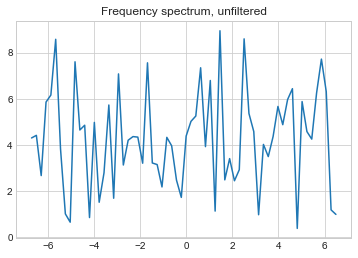

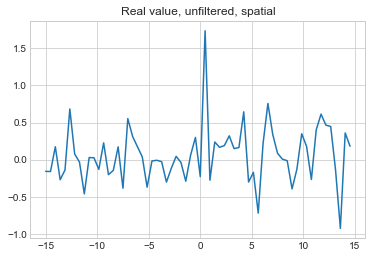

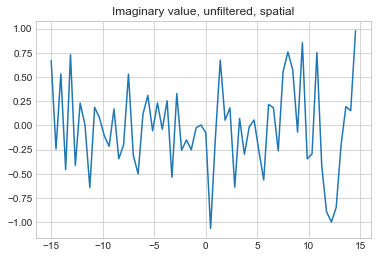

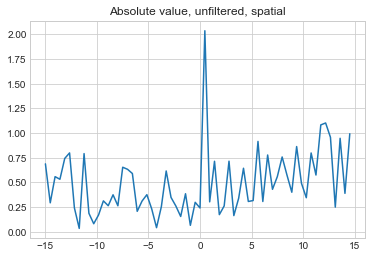

In [129]:
# First let's plot the original data before doing any filtering
fig = plt.figure()
ax = plt.axes()
plt.title('Frequency spectrum, unfiltered')
ax.plot(ks,
        np.abs(Un_fft));
fig = plt.figure()
ax = plt.axes()
plt.title('Real value, unfiltered, spatial')
ax.plot(x,
    np.real(Un));     
fig = plt.figure()
ax = plt.axes()
plt.title('Imaginary value, unfiltered, spatial')
ax.plot(x,
    np.imag(Un));
fig = plt.figure()
ax = plt.axes()
plt.title('Absolute value, unfiltered, spatial')
ax.plot(x,
        np.abs(Un));

# Filtered Data Plots
In each of the cells below I plot the filtered data for different filter bandwidths (gradually increasing by powers of 2). You can see how increasing this value makes the filtered data look more and more like a simple sine wave.

Also, I think I might be getting this backwards - maybe what I'm calling "bandwidth" is really (1/bandwidth). In that case I should say that bandwidth is decreasing as you go down these plots!

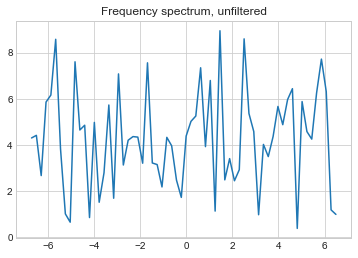

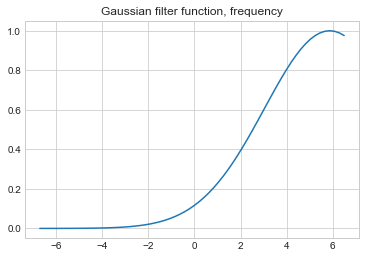

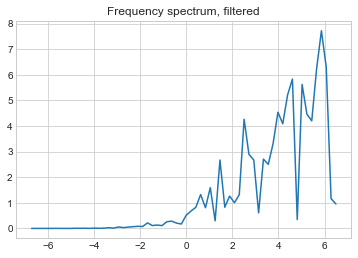

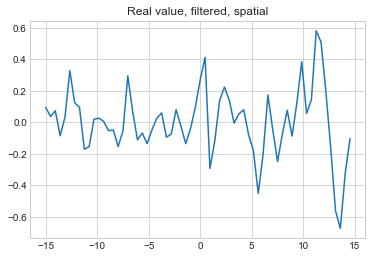

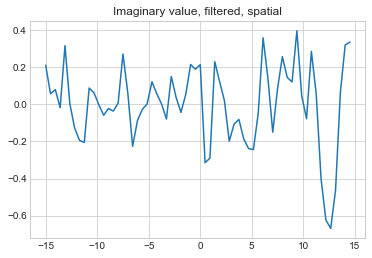

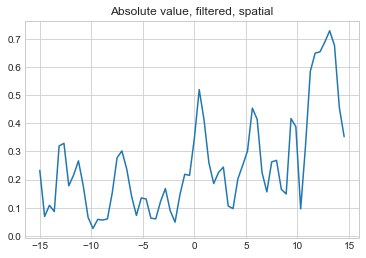

In [117]:
BANDWIDTH = 1/(2**4)
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

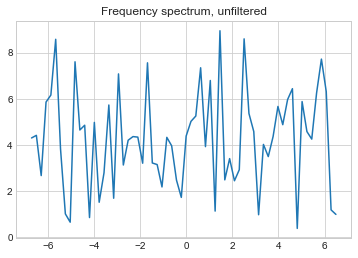

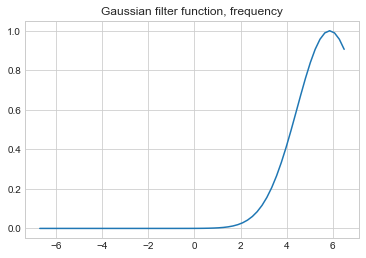

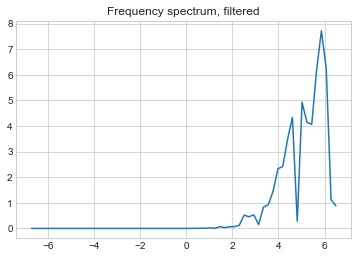

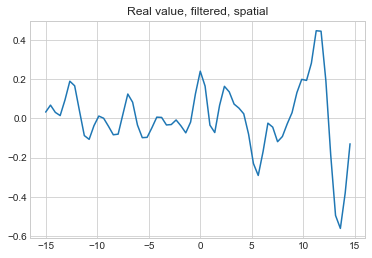

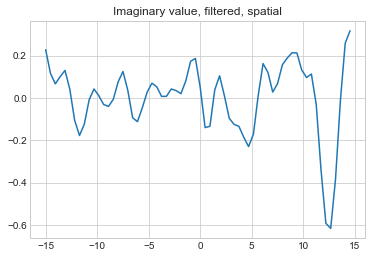

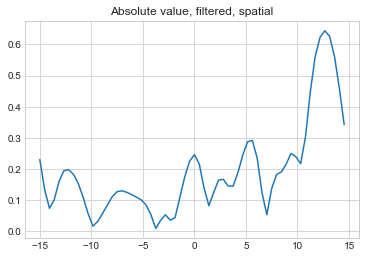

In [118]:
BANDWIDTH = 1/(2**2)
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

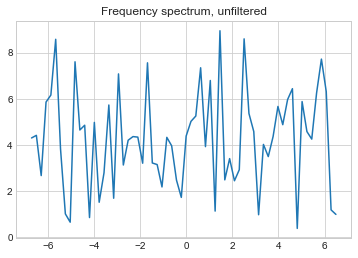

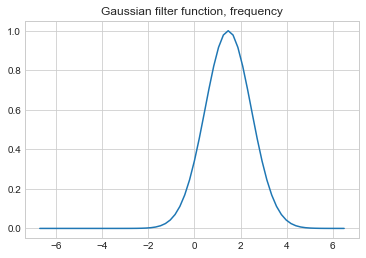

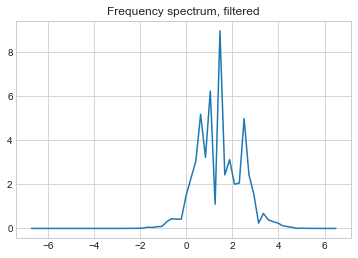

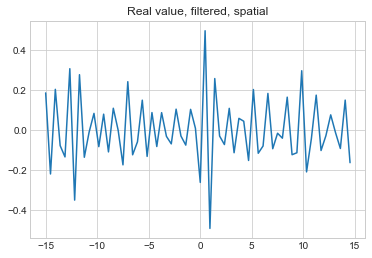

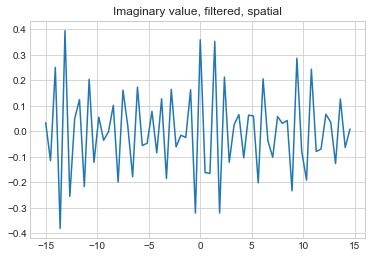

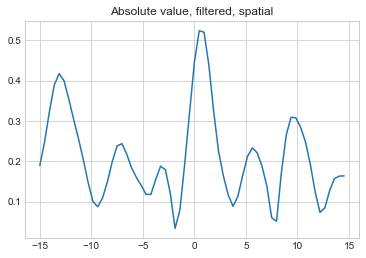

In [105]:
BANDWIDTH = 1/2
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

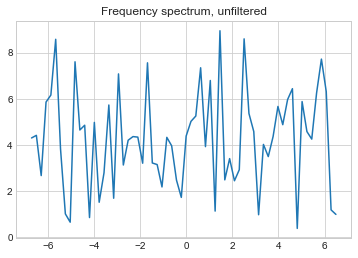

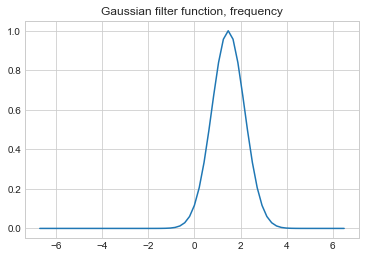

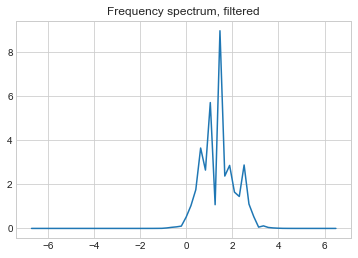

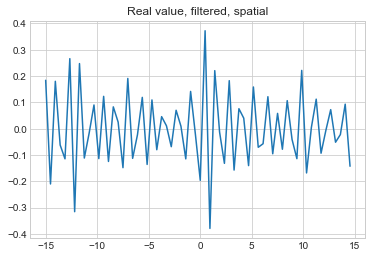

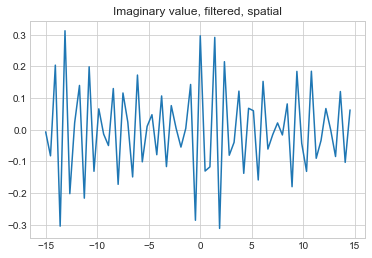

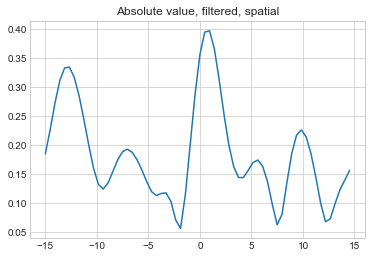

In [106]:
BANDWIDTH = 1
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

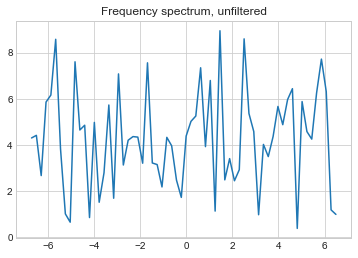

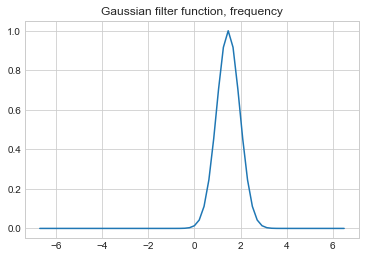

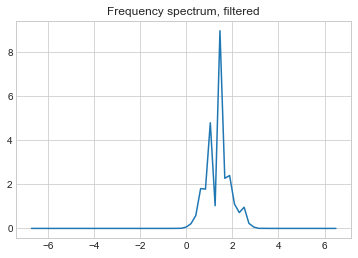

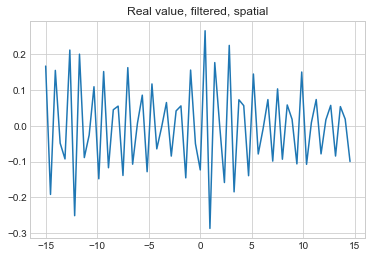

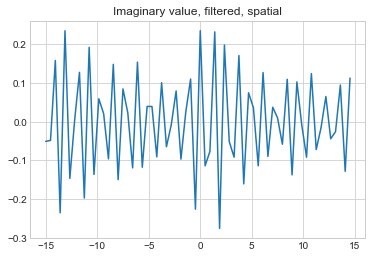

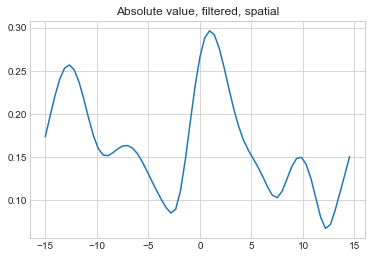

In [107]:
BANDWIDTH = 2
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

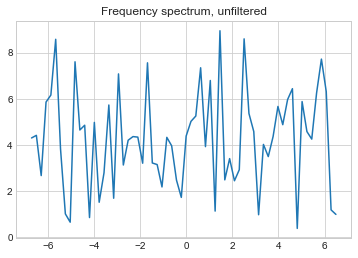

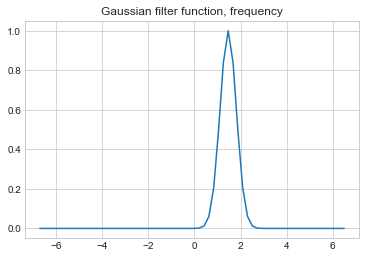

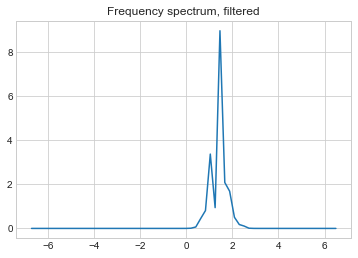

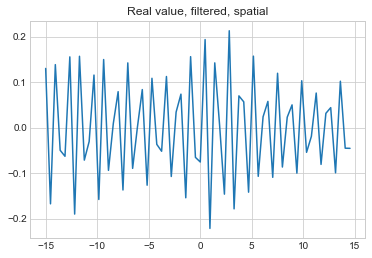

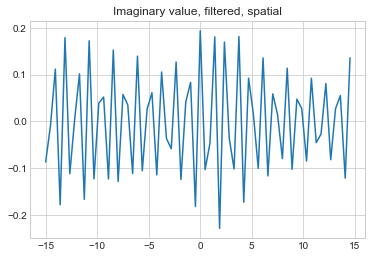

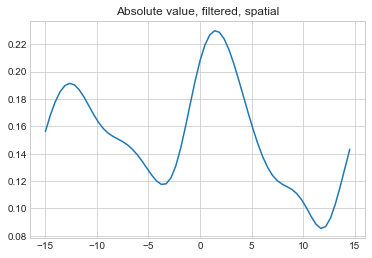

In [108]:
BANDWIDTH = 2**2
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

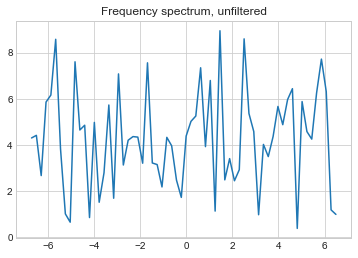

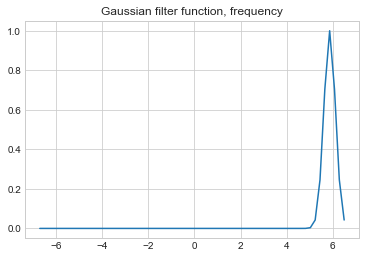

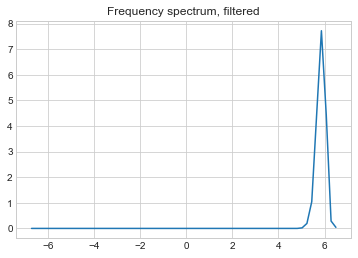

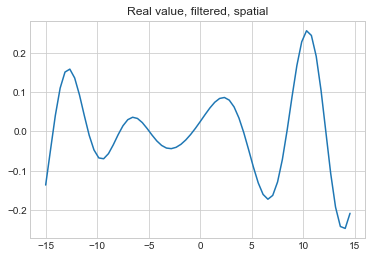

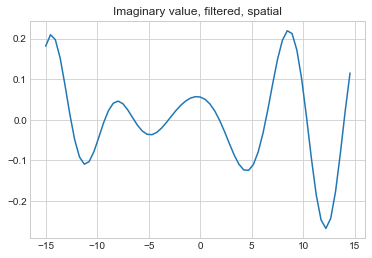

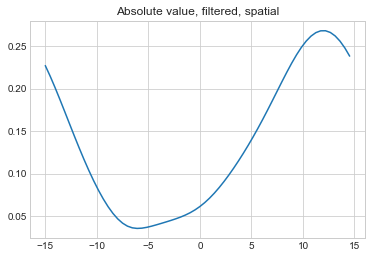

In [119]:
BANDWIDTH = 2**3
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

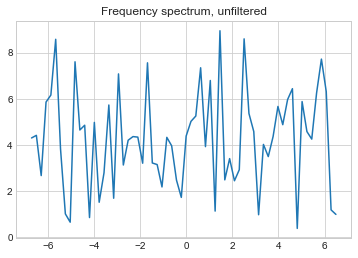

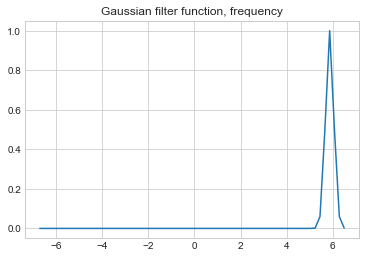

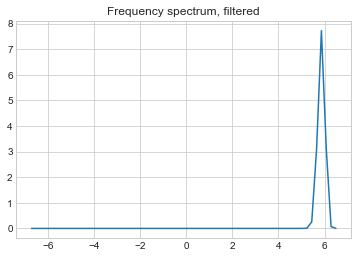

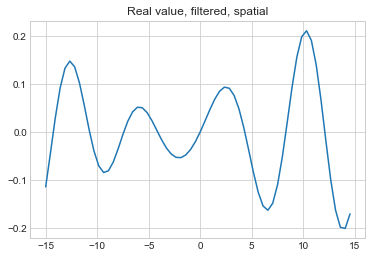

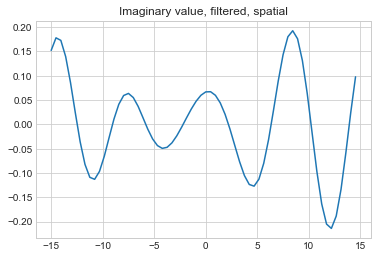

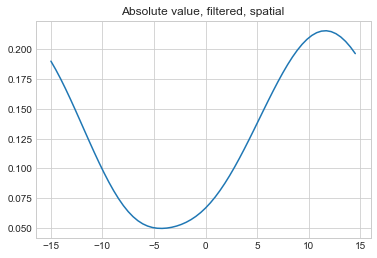

In [120]:
BANDWIDTH = 2**4
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

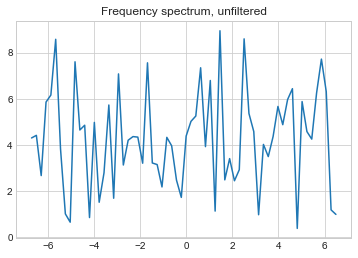

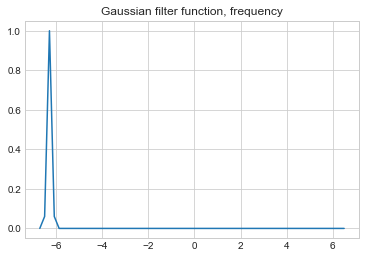

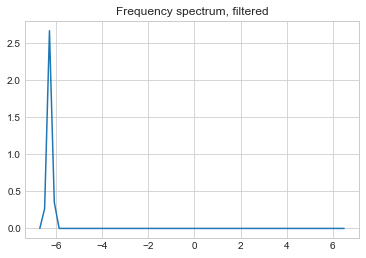

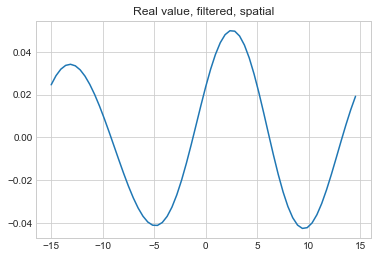

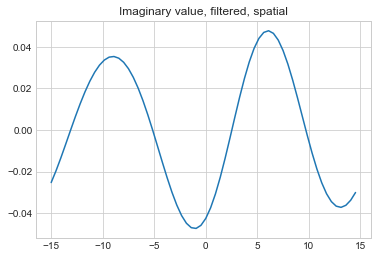

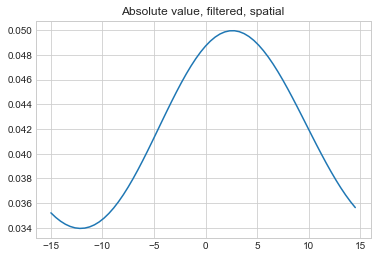

In [130]:
BANDWIDTH = 2**6
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)

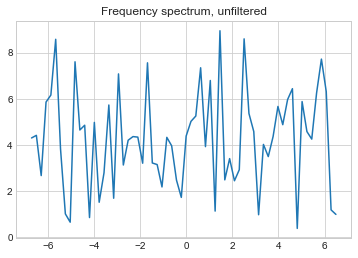

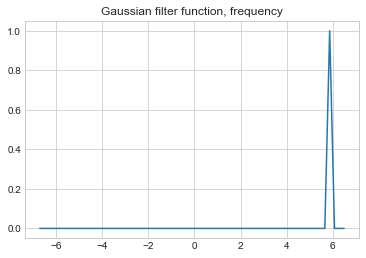

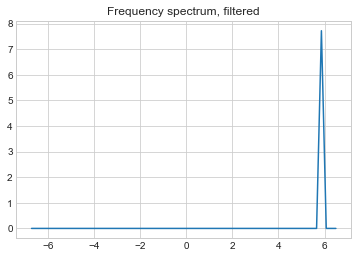

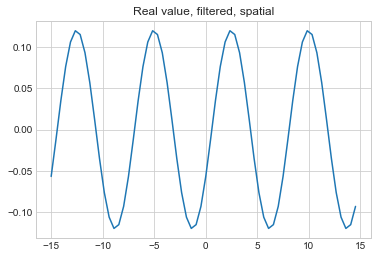

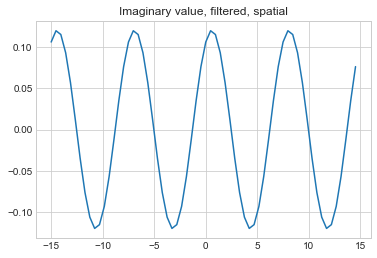

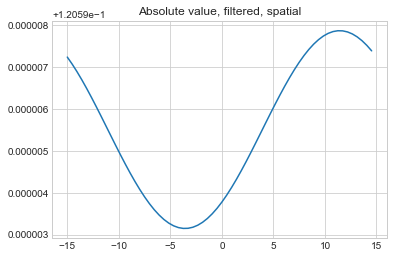

In [122]:
BANDWIDTH = 2**8
Un_filtered, fft_filtered, filter_weight = filter_data(Un_fft, ks, k_center, x, bandwidth=BANDWIDTH)